In [2]:
#importing the packages
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
import sklearn.metrics as metrics
Diabetes= pd.read_csv('diabetesInfosys.csv') # loading the dataset
Diabetes.head(10) # Displays top 10 records of the dataset

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
5,55,Male,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Positive
6,57,Male,Yes,Yes,No,Yes,Yes,Yes,No,No,No,Yes,Yes,No,No,No,Positive
7,66,Male,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,No,Yes,Yes,No,No,Positive
8,67,Male,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,Positive
9,70,Male,No,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,No,Yes,No,Positive


    Preparing the Dataset
    
> Checking for missing/null values.

> Examining the information in the columns.

> The fundamental statistics of the numeric column.

> Imputing/encoding the data (In this case, we'll convert Yes/No at the end because 0 and 1 in all the columns can be confusing).

In [3]:
Diabetes.isnull().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [3]:
Diabetes.isnull().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [4]:
Diabetes.isna().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [56]:
Diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [6]:
Diabetes.describe()

,Age
count,520.000000
mean,48.028846
std,12.151466
min,16.000000
25%,39.000000
50%,47.500000
75%,57.000000
max,90.000000


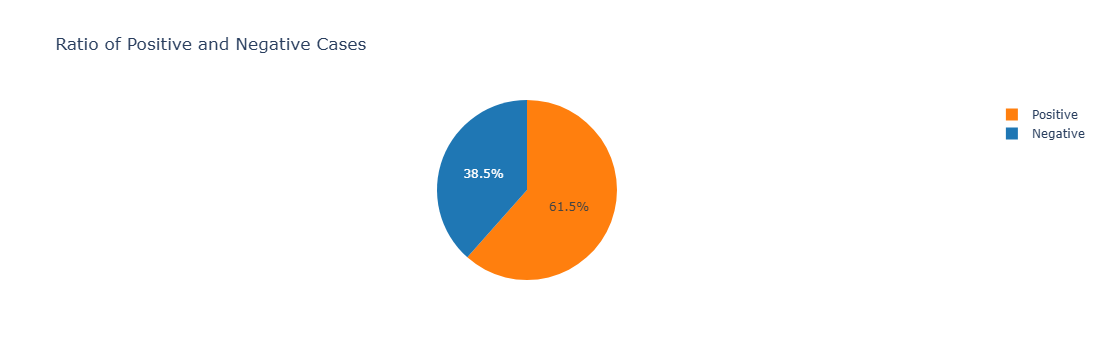

In [31]:

import plotly.express as px

# Count the occurrences of each class (positive/negative)
class_counts = Diabetes['class'].value_counts()

# Custom colors for the pie chart (e.g., green for negative, red for positive)
color_map = {'Negative': '#1f77b4', 'Positive': '#ff7f0e'}  # Custom colors: Blue and Orange

# Create the pie chart with custom colors
clspi = px.pie(values=class_counts, names=class_counts.index, title="Ratio of Positive and Negative Cases", 
               color=class_counts.index, color_discrete_map=color_map)
clspi.show()


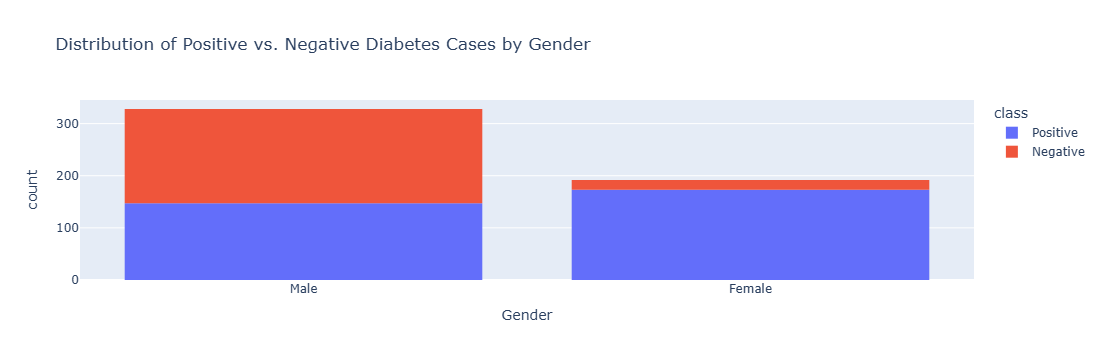

class,Negative,Positive
Gender,,
Female,9.500000,54.060000
Male,90.500000,45.940000


In [53]:
import plotly.express as px    # For Creating Interactive graphs
gendis= px.histogram(Diabetes, x = 'Gender', color = 'class', title="Distribution of Positive vs. Negative Diabetes Cases by Gender")
gendis.show()  
pltbl= ['Gender', 'class']
cm = sns.light_palette("green", as_cmap=True)
(round(pd.crosstab(Diabetes[pltbl[0]],Diabetes[pltbl[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)


The data shows that female patients have a higher positivity rate than male patients, suggesting a bias toward female patients with higher positivity.

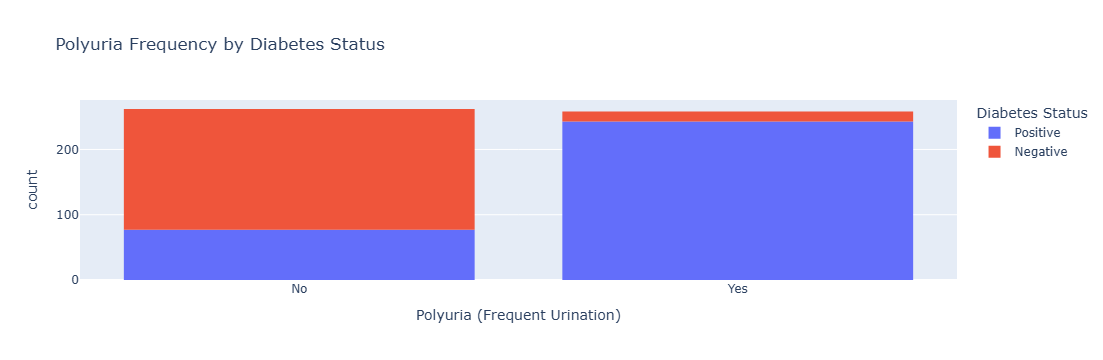

class,Negative,Positive
Polyuria,,
No,92.500000,24.060000
Yes,7.500000,75.940000


In [54]:
polyuria=px.histogram(Diabetes, x = 'Polyuria', color = 'class', title="Polyuria Frequency by Diabetes Status",
                       labels={"Polyuria": "Polyuria (Frequent Urination)", "count": "Number of Cases", "class": "Diabetes Status"})
polyuria.show() 

plttbl_polyuria= ['Polyuria', 'class']
cm = sns.light_palette("green", as_cmap=True)

(round(pd.crosstab(Diabetes[plttbl_polyuria[0]], Diabetes[plttbl_polyuria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)




If a patient has polyuria (frequent urination), there's a 76% chance they could have diabetes. If they don't have polyuria, there's a 92% chance they won't get diabetes.

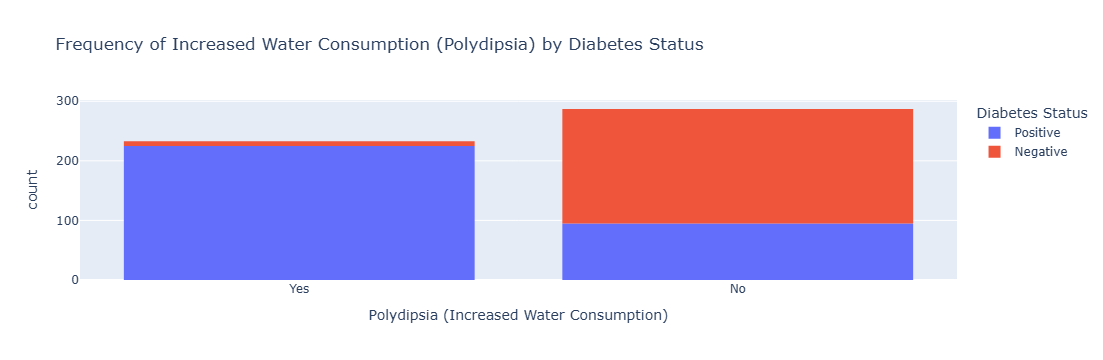

class,Negative,Positive
Polydipsia,,
No,96.000000,29.690000
Yes,4.000000,70.310000


In [10]:
polydispia = px.histogram(Diabetes, x = 'Polydipsia', color = 'class', title="Frequency of Increased Water Consumption (Polydipsia) by Diabetes Status",
    labels={"Polydipsia": "Polydipsia (Increased Water Consumption)", "count": "Number of Cases", "class": "Diabetes Status"})
polydispia.show() 

plttblpolydispia= ['Polydipsia', 'class']
rm = sns.light_palette("green", as_cmap=True)
(round(pd.crosstab(Diabetes[plttblpolydispia[0]], Diabetes[plttblpolydispia[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = rm)

If a person has polydipsia (excessive thirst), there's a 70% chance they will develop diabetes. If they don’t have polydipsia, there's a 96% chance they won’t get diabetes.

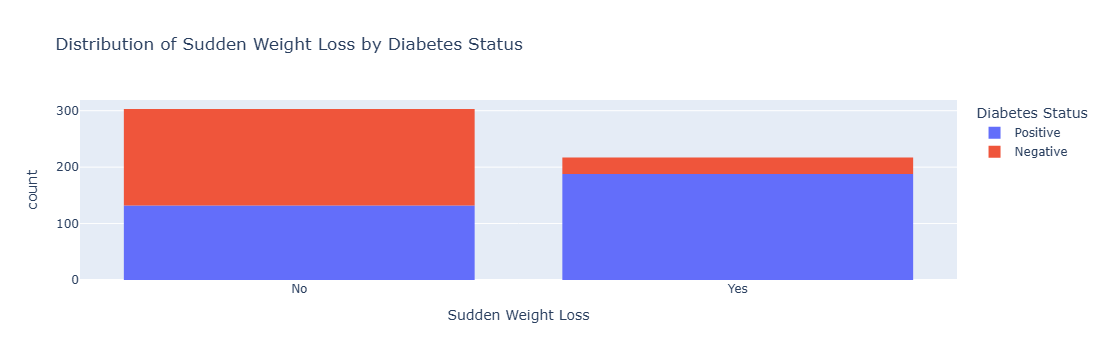

class,Negative,Positive
sudden weight loss,,
No,85.500000,41.250000
Yes,14.500000,58.750000


In [11]:
swl = px.histogram(Diabetes, x = 'sudden weight loss', color = 'class', title="Distribution of Sudden Weight Loss by Diabetes Status",
    labels={"sudden weight loss": "Sudden Weight Loss", "count": "Number of Cases", "class": "Diabetes Status"})
swl.show() 

plttblswl= ['sudden weight loss', 'class']
qm = sns.light_palette("green", as_cmap=True)
(round(pd.crosstab(Diabetes[plttblswl[0]], Diabetes[plttblswl[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = qm)

Unexpected weight loss is linked to a 58% chance of having diabetes. However, other common illnesses can also cause weight loss, so it's not always a definitive sign of diabetes.
Unexpected weight loss is an important indicator, but it is less significant than Polyuria (frequent urination) or Polydipsia (excessive thirst) when predicting diabetes.

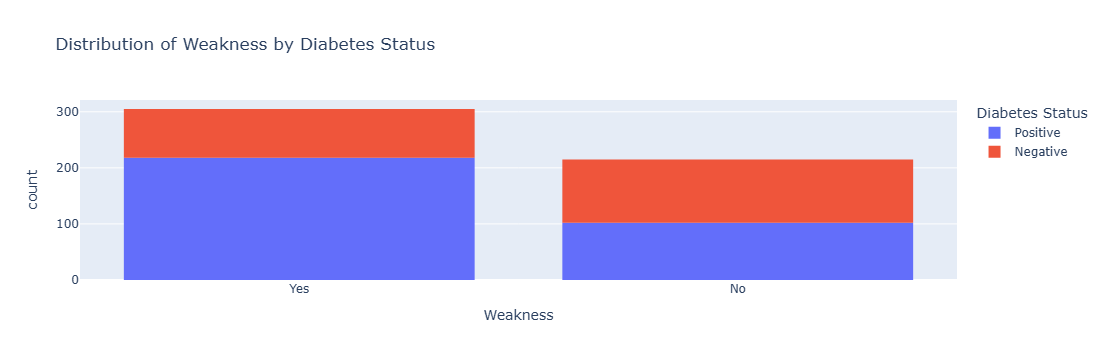

class,Negative,Positive
weakness,,
No,56.500000,31.870000
Yes,43.500000,68.120000


In [12]:
swl = px.histogram(Diabetes, x = 'weakness', color = 'class', title="Distribution of Weakness by Diabetes Status",
    labels={"weakness": "Weakness", "count": "Number of Cases", "class": "Diabetes Status"})
swl.show() 
wkns = ['weakness', 'class']
sm = sns.light_palette("green", as_cmap=True)
(round(pd.crosstab(Diabetes[wkns [0]],Diabetes[wkns [1]], normalize='columns') * 100,2)).style.background_gradient(cmap = sm)

   Individuals with weakness have a 68% chance of testing positive for diabetes.


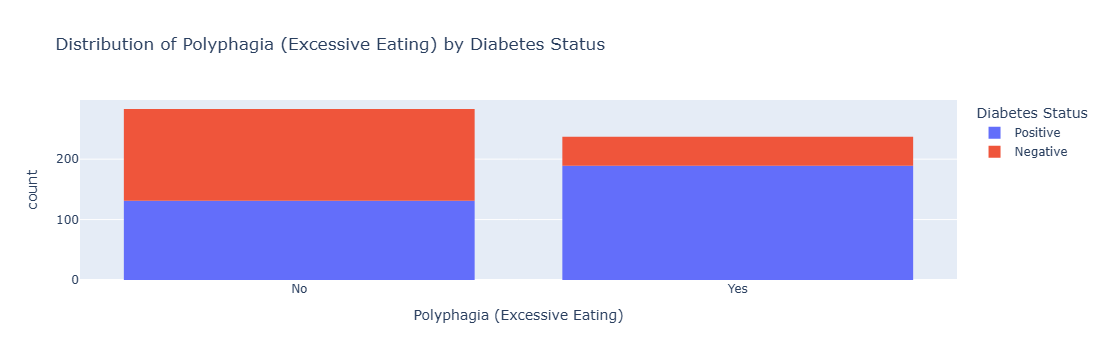

class,Negative,Positive
Polyphagia,,
No,76.000000,40.940000
Yes,24.000000,59.060000


In [13]:
eating = px.histogram(Diabetes, x = 'Polyphagia', color = 'class', title="Distribution of Polyphagia (Excessive Eating) by Diabetes Status",
   
    labels={"Polyphagia": "Polyphagia (Excessive Eating)", "count": "Number of Cases", "class": "Diabetes Status"})
eating.show() 

plt_eating= ['Polyphagia', 'class']
tm = sns.light_palette("green", as_cmap=True)
(round(pd.crosstab(Diabetes[plt_eating[0]], Diabetes[plt_eating[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = tm)

Individuals with an obsessive eating disorder have a 59% chance of developing diabetes, but a 76% chance of not developing it, indicating a lower risk for diabetes.

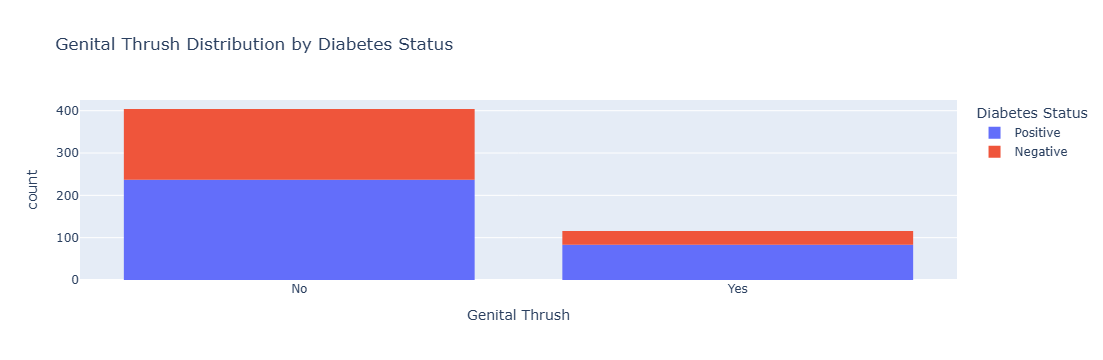

class,Negative,Positive
Genital thrush,,
No,83.500000,74.060000
Yes,16.500000,25.940000


In [14]:
gntlthrsh = px.histogram(Diabetes, x = 'Genital thrush',color='class',title="Genital Thrush Distribution by Diabetes Status",
    
    labels={"Genital thrush": "Genital Thrush", "count": "Number of Cases", "class": "Diabetes Status"})
gntlthrsh.show()

plt_thrsh= ['Genital thrush', 'class']
um = sns.light_palette("green", as_cmap=True)
(round(pd.crosstab(Diabetes[plt_thrsh[0]], Diabetes[plt_thrsh[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = um)

Individuals with genital thrush have a 25.94% chance of testing positive for diabetes, while those without genital thrush have a 74.06% chance of testing positive. 

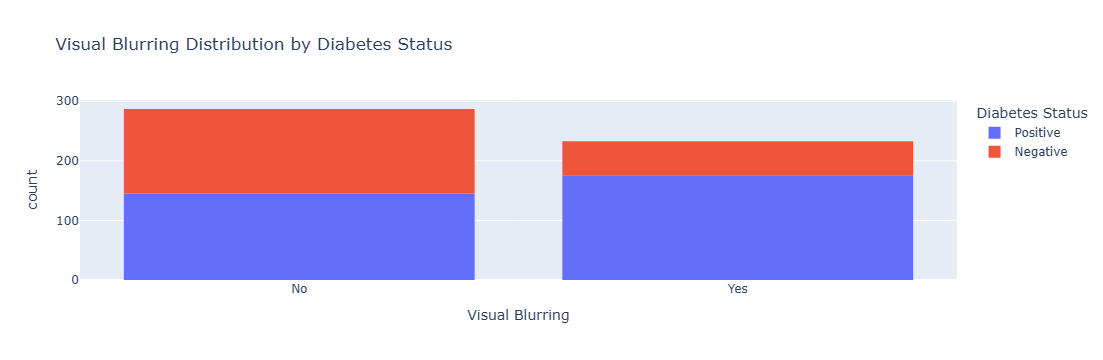

class,Negative,Positive
visual blurring,,
No,71.000000,45.310000
Yes,29.000000,54.690000


In [15]:
visual = px.histogram(Diabetes, x = 'visual blurring', color = 'class',  title="Visual Blurring Distribution by Diabetes Status",
  
    labels={"visual blurring": "Visual Blurring", "count": "Number of Cases", "class": "Diabetes Status"})
visual.show() 

plt_blurring= ['visual blurring', 'class']
tm = sns.light_palette("green", as_cmap=True)
(round(pd.crosstab(Diabetes[plt_blurring[0]], Diabetes[plt_blurring[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = tm)


Individuals with visual blurring have a 54.69% chance of testing positive for diabetes, while those without visual blurring have a 45.31% chance of testing positive.

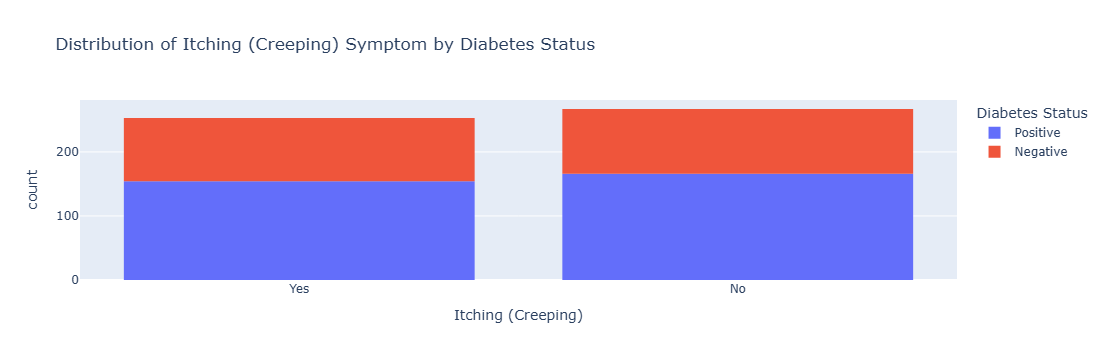

class,Negative,Positive
Itching,,
No,50.500000,51.880000
Yes,49.500000,48.120000


In [16]:
creeping = px.histogram(Diabetes, x = 'Itching', color = 'class', title="Distribution of Itching (Creeping) Symptom by Diabetes Status",
  
    labels={"Itching": "Itching (Creeping)", "count": "Number of Cases", "class": "Diabetes Status"})
creeping.show() 

plt_creeping= ['Itching', 'class']
tm = sns.light_palette("green", as_cmap=True)
(round(pd.crosstab(Diabetes[plt_creeping[0]], Diabetes[plt_creeping[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = tm)

Individuals with itching have a 48.12% chance of testing positive for diabetes, while those without itching have a 51.88% chance of testing positive. This shows that itching has a minimal impact on the likelihood of testing positive for diabetes.

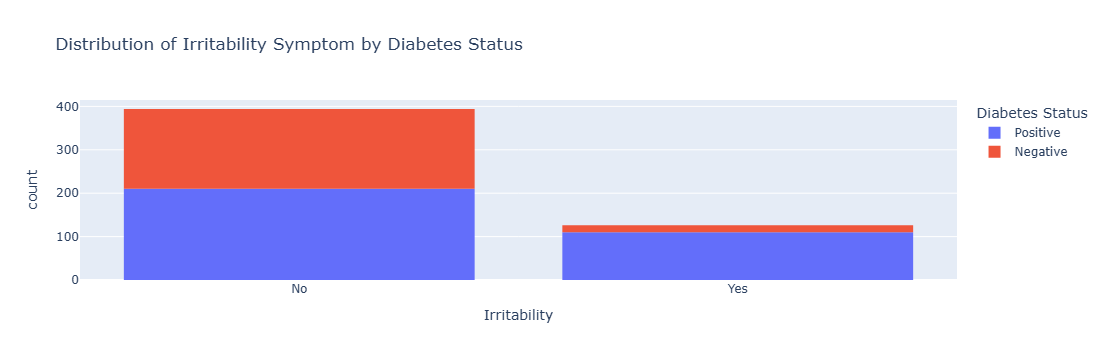

class,Negative,Positive
Irritability,,
No,92.000000,65.620000
Yes,8.000000,34.380000


In [17]:
irritiability = px.histogram(Diabetes, x = 'Irritability', color = 'class', title="Distribution of Irritability Symptom by Diabetes Status",
   
    labels={"Irritability": "Irritability", "count": "Number of Cases", "class": "Diabetes Status"})
irritiability.show() 

plt_irritiability= ['Irritability', 'class']
tm = sns.light_palette("green", as_cmap=True)
(round(pd.crosstab(Diabetes[plt_irritiability[0]], Diabetes[plt_irritiability[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = tm)

Individuals with irritability have a 34.38% chance of testing positive for diabetes, while those without irritability have a 65.62% chance of testing positive. This suggests that irritability is associated with a lower likelihood of testing positive for diabetes.

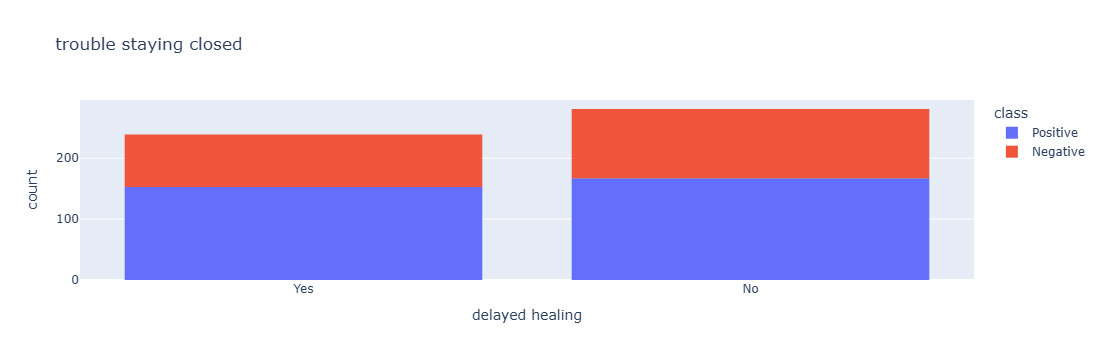

class,Negative,Positive
delayed healing,,
No,57.000000,52.190000
Yes,43.000000,47.810000


In [18]:
dh = px.histogram(Diabetes, x = 'delayed healing', color = 'class', title="trouble staying closed")
dh.show() 

plt_dh= ['delayed healing', 'class']
tm = sns.light_palette("green", as_cmap=True)
(round(pd.crosstab(Diabetes[plt_dh[0]], Diabetes[plt_dh[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = tm)

Individuals with delayed healing have a 47.81% chance of testing positive for diabetes, while those without delayed healing have a 52.19% chance of testing positive. This indicates that delayed healing has a minimal impact on the likelihood of testing positive for diabetes.

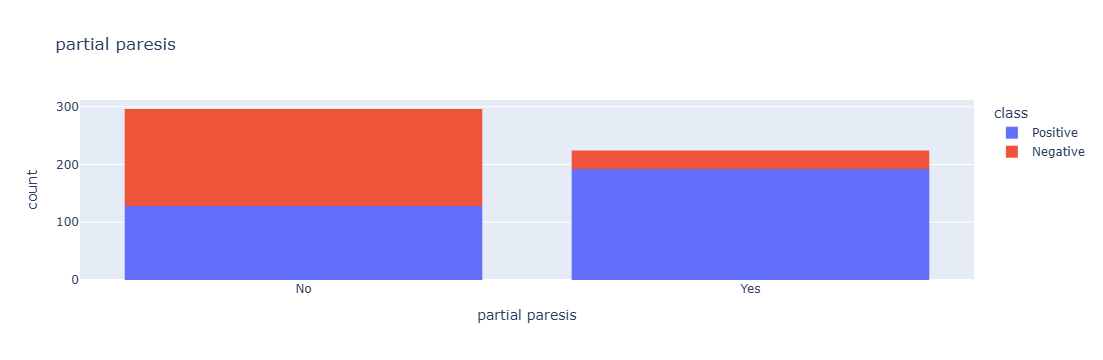

class,Negative,Positive
partial paresis,,
No,84.000000,40.000000
Yes,16.000000,60.000000


In [19]:
paresis = px.histogram(Diabetes, x = 'partial paresis', color = 'class', title="partial paresis")
paresis.show() 

plt_paresis= ['partial paresis', 'class']
tm = sns.light_palette("green", as_cmap=True)
(round(pd.crosstab(Diabetes[plt_paresis[0]], Diabetes[plt_paresis[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = tm)

Individuals with partial paresis have a 60% chance of testing positive for diabetes, while those without partial paresis have a 40% chance of testing positive.

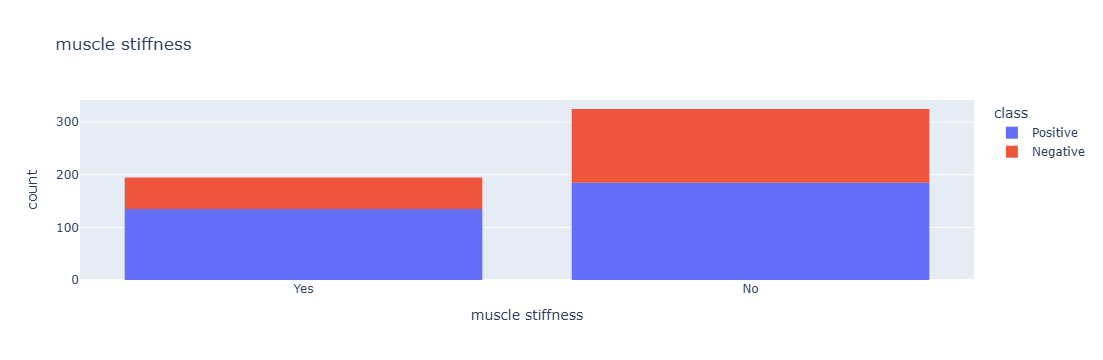

class,Negative,Positive
muscle stiffness,,
No,70.000000,57.810000
Yes,30.000000,42.190000


In [20]:
muscle_stiffness = px.histogram(Diabetes, x = 'muscle stiffness', color = 'class', title="muscle stiffness")
muscle_stiffness.show() 

plt_stiffness= ['muscle stiffness', 'class']
tm = sns.light_palette("green", as_cmap=True)
(round(pd.crosstab(Diabetes[plt_stiffness[0]], Diabetes[plt_stiffness[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = tm)

Individuals with muscle stiffness have a 42.19% chance of testing positive for diabetes, while those without muscle stiffness have a 57.81% chance of testing positive. This indicates that muscle stiffness is associated with a slightly lower likelihood of testing positive for diabetes.

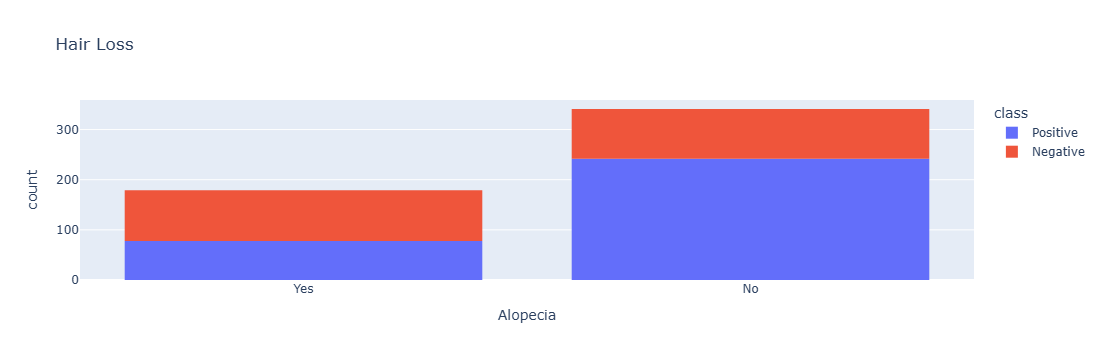

class,Negative,Positive
Alopecia,,
No,49.500000,75.620000
Yes,50.500000,24.380000


In [21]:
Hair_loss = px.histogram(Diabetes, x = 'Alopecia', color = 'class', title="Hair Loss")
Hair_loss.show() 

plt_Hair_loss= ['Alopecia', 'class']
tm = sns.light_palette("green", as_cmap=True)
(round(pd.crosstab(Diabetes[plt_Hair_loss[0]], Diabetes[plt_Hair_loss[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = tm)

Individuals with alopecia have a 24.38% chance of testing positive for diabetes, while those without alopecia have a 75.62% chance of testing positive. This suggests that alopecia is associated with a lower likelihood of testing positive for diabetes

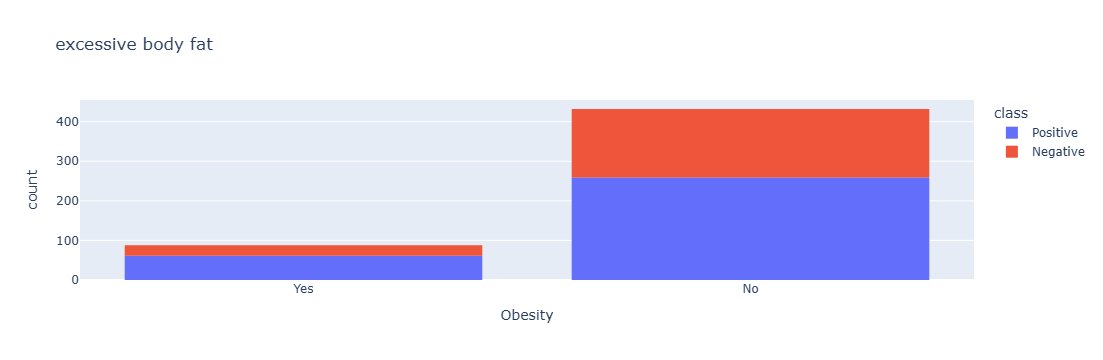

class,Negative,Positive
Obesity,,
No,86.500000,80.940000
Yes,13.500000,19.060000


In [55]:
Obesity = px.histogram(Diabetes, x = 'Obesity', color = 'class', title="excessive body fat")
Obesity.show() 

plt_body_fat= ['Obesity', 'class']
tm = sns.light_palette("green", as_cmap=True)
(round(pd.crosstab(Diabetes[plt_body_fat[0]], Diabetes[plt_body_fat[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = tm)

Individuals with obesity have a 19.06% chance of testing positive for diabetes, while those without obesity have an 80.94% chance of testing positive. This suggests that obesity is associated with a reduced likelihood of testing positive for diabetes in this dataset.

In [23]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score,confusion_matrix,recall_score,roc_auc_score
%matplotlib inline
from sklearn import model_selection
number = preprocessing.LabelEncoder()
dtacpy1 = Diabetes.copy()   # Duplicating the Dataset 
dtacpy1.head(5)


,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [24]:
for i in dtacpy1:
    dtacpy1[i] = number.fit_transform(dtacpy1[i])
dtacpy1.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,16,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,34,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,17,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,21,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,36,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [51]:

X = dtacpy1.drop(['class'],axis=1) # Independent 
y= dtacpy1['class'] # Dependent
X.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
0,16,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1
1,34,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0
2,17,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0
3,21,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0
4,36,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1


In [26]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: class, dtype: int32

Feature Correlations with Target Variable:
 Age                   0.106419
Gender               -0.449233
Polyuria              0.665922
Polydipsia            0.648734
sudden weight loss    0.436568
weakness              0.243275
Polyphagia            0.342504
Genital thrush        0.110288
visual blurring       0.251300
Itching              -0.013384
Irritability          0.299467
delayed healing       0.046980
partial paresis       0.432288
muscle stiffness      0.122474
Alopecia             -0.267512
Obesity               0.072173
dtype: float64


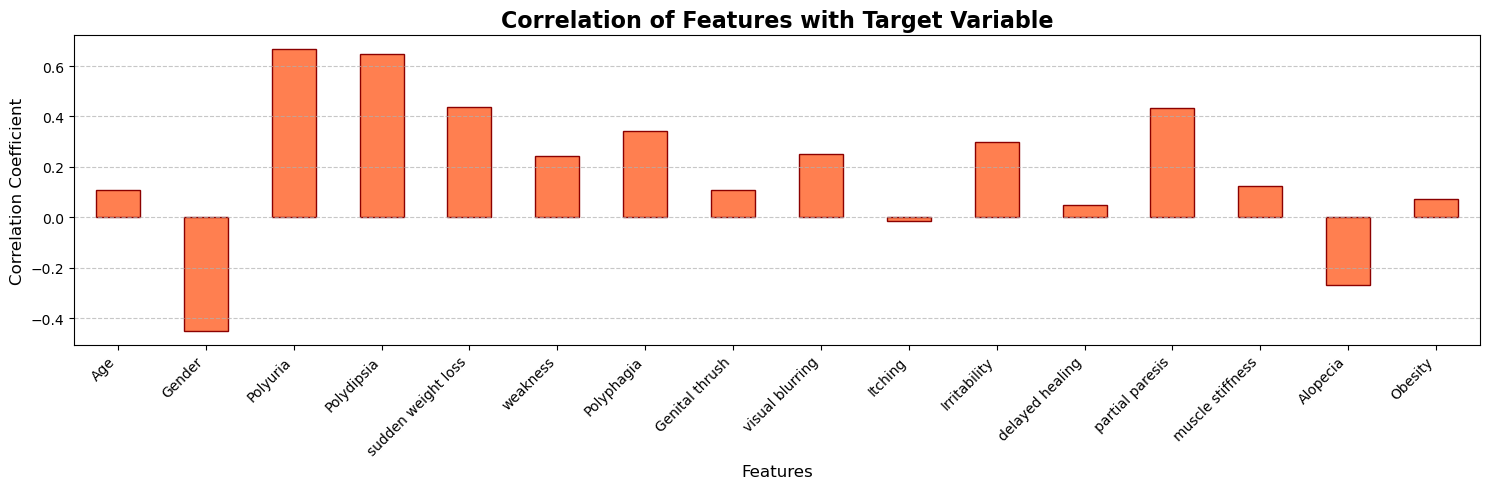

In [27]:
import matplotlib.pyplot as plt

# Calculate the correlation of each feature with the target variable
correlation = X.corrwith(y)

# Print the correlation values for reference
print("Feature Correlations with Target Variable:\n", correlation)

# Enhanced Bar Plot for Correlation with custom color
plt.figure(figsize=(15, 5))
correlation.plot(
    kind="bar",
    color="coral",  # Change bar color to coral
    edgecolor="darkred",
    linewidth=1,
    title="Feature Correlation with Target Variable (Class)"
)

# Add grid and adjust plot aesthetics
plt.title("Correlation of Features with Target Variable", fontsize=16, fontweight='bold')
plt.xlabel("Features", fontsize=12)
plt.ylabel("Correlation Coefficient", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

# Display the plot
plt.show()


From the graph above, we can identify a strong correlation between the variable "Class" (indicating diabetes presence) and specific factors, listed in order of strongest positive relationship:

Polyuria (frequent urination)
Polydipsia (increased thirst)
Sudden weight loss
Partial paresis (muscle weakness)
These factors are positively correlated with the likelihood of diabetes, meaning patients showing these symptoms are more likely to be diagnosed as diabetic. This insight is key for identifying individuals at higher risk based on common symptoms.

On the other hand, variables that show a negative correlation—such as Alopecia (hair loss)—appear much less significant. A negative correlation with "Class" suggests that if a patient tests positive for alopecia alone, they are unlikely to be diabetic. Thus, alopecia is not a meaningful indicator of diabetes risk in isolation.

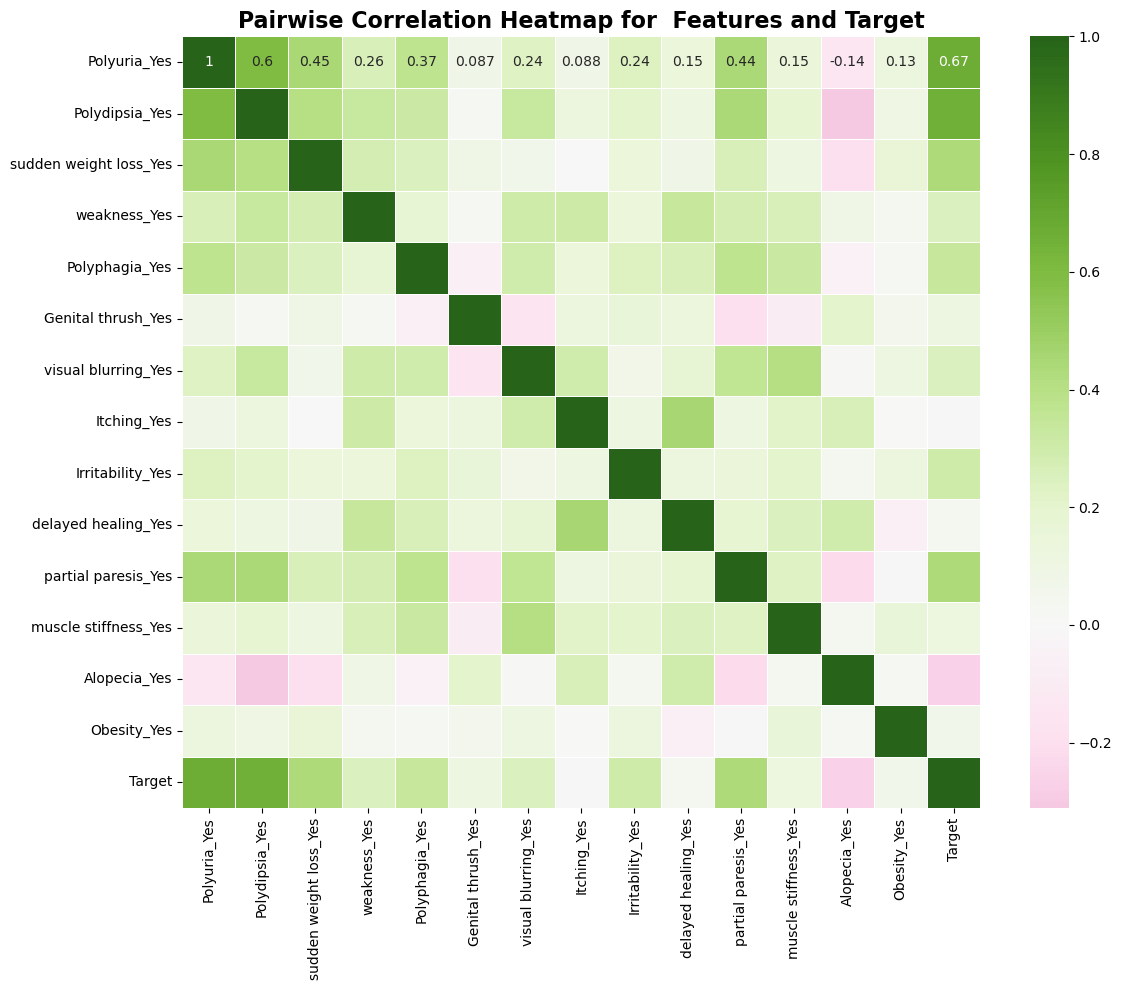

In [45]:

symptoms = ["Polyuria", "Polydipsia", "sudden weight loss", "weakness", "Polyphagia", 
            "Genital thrush", "visual blurring", "Itching", "Irritability", 
            "delayed healing", "partial paresis", "muscle stiffness", "Alopecia", "Obesity"]

df_binary = pd.get_dummies(Diabetes[symptoms], drop_first=True)
df_binary['Target'] = Diabetes['class'].apply(lambda x: 1 if x == "Positive" else 0)

# Calculate pairwise correlations
corr_matrix_binary = df_binary.corr()

# Plotting heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix_binary, cmap="PiYG", annot=True, linewidths=0.5, center=0)

plt.title("Pairwise Correlation Heatmap for  Features and Target", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


The pairwise correlation heatmap for binary features provides the following insights about the relationships between symptoms and diabetes:

1)Direct Symptom-Diabetes Correlation:
    -> The correlation values in the "Target" row show how strongly each symptom is associated with a diabetes diagnosis (positive correlation) or with        the absence of diabetes (negative correlation).
    -> Positive Correlations (values closer to +1): Symptoms with higher positive correlations are more commonly present in individuals diagnosed with         diabetes. For instance, if symptoms like Polyuria or Polydipsia have high positive correlations, this indicates these symptoms are strong               indicators of diabetes.
    -> Negative Correlations (values closer to -1): Symptoms with negative correlations may be more frequent in individuals without diabetes. For              instance, if Alopecia shows a negative correlation, it could indicate that individuals with alopecia are less likely to be diagnosed with               diabetes.

2)Inter-Symptom Relationships:
Symptoms with high correlations to each other may indicate a tendency to co-occur. For example, if Polyuria and Polydipsia show a strong correlation with each other, it suggests these symptoms often appear together in diabetic patients, possibly due to similar physiological effects.Weak or Neutral 

3)Correlations:
Features with correlation values near zero with the target variable may not contribute much to diabetes prediction and could be less useful in diagnostic contexts. These features might represent common symptoms that don’t have a strong association with diabetes specifically, such as symptoms more related to other health issues.

4)Potential Predictive Indicators:
The symptoms with the strongest positive or negative correlations with the target variable are the most useful for diagnosis and model prediction. Positive indicators (e.g., symptoms highly correlated with diabetes) could become focus points for early screening.

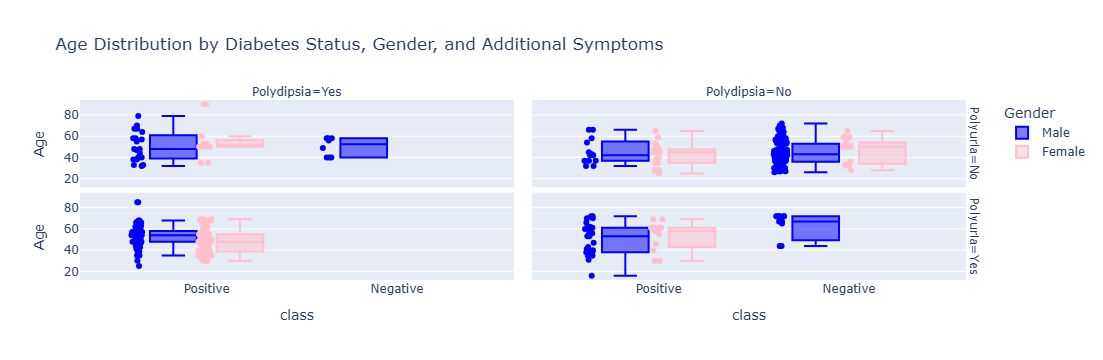

In [29]:
# Enhanced box plot with all dataset features in tooltips
genbox = px.box(
    Diabetes,
    y="Age",
    x="class",
    color="Gender",
    points="all",
    title="Age Distribution by Diabetes Status, Gender, and Additional Symptoms",
    
    # Custom color mapping for gender
    color_discrete_map={"Male": "blue", "Female": "pink"},
    
    # Adding facets for additional segmentation (e.g., by "sudden weight loss")
    facet_row="Polyuria",  # Faceting by Polyuria (could change based on interest)
    facet_col="Polydipsia",  # Faceting by Polydipsia
    
    # Including all relevant attributes as hover data for insight
    hover_data={
        "Polyuria": True,
        "Polydipsia": True,
        "sudden weight loss": True,
        "weakness": True,
        "Polyphagia": True,
        "Genital thrush": True,
        "visual blurring": True,
        "Itching": True,
        "Irritability": True,
        "partial paresis": True,
        "Alopecia": True,
        "class": True
    }
)

# Show the enhanced plot
genbox.show()


The box plot shows that age and gender influence diabetes status, with younger females and older males showing distinct patterns. Symptoms like frequent urination (Polyuria) and excessive thirst (Polydipsia) are commonly seen in diabetes-positive cases, while symptoms like hair loss (Alopecia) are less common among them. This plot helps us ientify typical diabetes symptoms and points to specific combinations of age, gender, and symptoms that may assist in early detection of diabetes.